## Connect to drive

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import cv2
from PIL import Image
import glob as gb
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
sns.set(rc={'figure.figsize':(15,10)})

## get data from drive and append into list

In [5]:
x = []
y = []

In [6]:
class_label = 0
test = '/gdrive/My Drive/Rock-Paper-Scissors new/train/'
for folder in os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str(test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
    class_label = class_label + 1

scissors
paper
rock


In [7]:
class_label = 0
test = "/gdrive/My Drive/Rock-Paper-Scissors new/test/"
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str( test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
    class_label = class_label + 1

paper
rock
scissors


## Convert to numpy array

In [8]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2892, 227, 227)
(2892,)


# Scale

In [9]:
x = x/255

In [10]:
y

array([0, 0, 0, ..., 2, 2, 2])

## Split data

In [11]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# apply dummy to y_train 

In [12]:
y_train = np_utils.to_categorical(y_train)

In [13]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Model architecture

In [16]:
model = models.Sequential()

model.add(Input(shape=(227, 227, 1)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2)))

model.add(Flatten())
model.add(Dense(1228, activation='relu'))
model.add(Dense(384, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(192, activation='relu'))
model.add(Dense(3, activation = "softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

model.summary()

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 227, 227, 64)      1664      
                                                                 
 batch_normalization_4 (Batc  (None, 227, 227, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 113, 113, 64)      102464    
                                                                 
 batch_normalization_5 (Batc  (None, 113, 113, 64)     256       
 hNormalization)                                                 
                                                      

In [17]:
history = model.fit(x_train,y_train, batch_size= 10, epochs = 30)

Epoch 1/30
203/203 [==============================] - 31s 94ms/step - loss: 11.5476 - accuracy: 0.5894
Epoch 2/30
203/203 [==============================] - 19s 93ms/step - loss: 2.5548 - accuracy: 0.8389
Epoch 3/30
203/203 [==============================] - 19s 94ms/step - loss: 1.0660 - accuracy: 0.9214
Epoch 4/30
203/203 [==============================] - 20s 96ms/step - loss: 0.4905 - accuracy: 0.9585
Epoch 5/30
203/203 [==============================] - 19s 96ms/step - loss: 0.5030 - accuracy: 0.9629
Epoch 6/30
203/203 [==============================] - 19s 95ms/step - loss: 0.1377 - accuracy: 0.9778
Epoch 7/30
203/203 [==============================] - 19s 94ms/step - loss: 0.0826 - accuracy: 0.9881
Epoch 8/30
203/203 [==============================] - 19s 95ms/step - loss: 0.3761 - accuracy: 0.9773
Epoch 9/30
203/203 [==============================] - 19s 95ms/step - loss: 0.1593 - accuracy: 0.9872
Epoch 10/30
203/203 [==============================] - 19s 95ms/step - loss: 0.16

# Evaluate data

## loss and accuracy plot

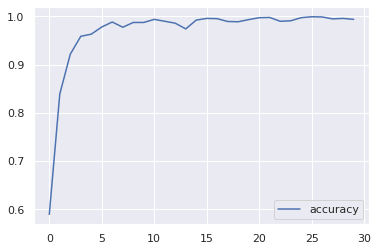

In [18]:
#plot the accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='accuracy')
plt.legend();

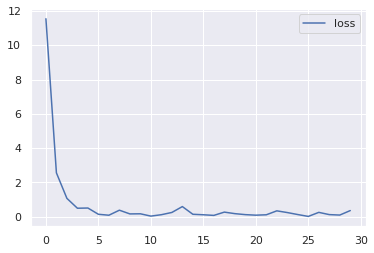

In [19]:
#plot the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.legend()

## Check evalute in train and test data

In [20]:
# Train
loss, acc = model.evaluate(x_train, y_train)
print('Train')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

64/64 [==============================] - 4s 46ms/step - loss: 14.1904 - accuracy: 0.8458
Train
loss : 14.190390586853027
acc : 84.58498120307922


In [21]:
# Test
loss, acc = model.evaluate(xtest, np_utils.to_categorical(ytest))
print('Test')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

28/28 [==============================] - 1s 47ms/step - loss: 17.7215 - accuracy: 0.7995
Test
loss : 17.721473693847656
acc : 79.95391488075256


In [22]:
pred = model.predict(xtest)
pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 9.1388403e-27],
       [0.0000000e+00, 2.5106389e-20, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [23]:
prediction = np.argmax(pred, axis=-1)
prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,

## Confusion matrix

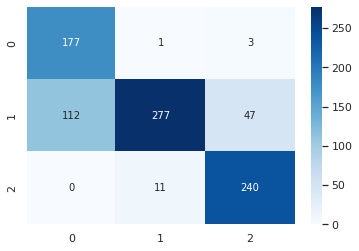

In [24]:
sns.heatmap(confusion_matrix(prediction, ytest), annot=True, fmt='1', cmap='Blues');

## Recall and Precision

In [25]:
print('Model Recall score  : {0:0.4f}'. format(recall_score(ytest, prediction,average='weighted')))
print('Model Precision  : {0:0.4f}'. format(precision_score(ytest, prediction,average='weighted')))

Model Recall score  : 0.7995
Model Precision  : 0.8566


In [26]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75       289
           1       0.64      0.96      0.76       289
           2       0.96      0.83      0.89       290

    accuracy                           0.80       868
   macro avg       0.86      0.80      0.80       868
weighted avg       0.86      0.80      0.80       868

